**Step 1: Install OpenCV**

In [ ]:
!pip install opencv-python-headless


**Step 2: Import Necessary Libraries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Function to display an image using matplotlib
def display_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Indented this line
    plt.title(title) # Indented this line
    plt.axis('off') # Indented this line
    plt.show() # Indented this line
# Function to display two images side by side
def display_images(img1, img2, title1="Image 1", title2="Image 2"):
    plt.subplot(1, 2, 1) # Indented this line
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)) # Indented this line
    plt.title(title1) # Indented this line
    plt.axis('off') # Indented this line
    plt.subplot(1, 2, 2) # Indented this line
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)) # Indented this line
    plt.title(title2) # Indented this line
    plt.axis('off') # Indented this line
    plt.show() # Indented this line

**Step 3: Load an Image**

Saving 275665853_658921542045650_512855639586224313_n.jpg to 275665853_658921542045650_512855639586224313_n (2).jpg


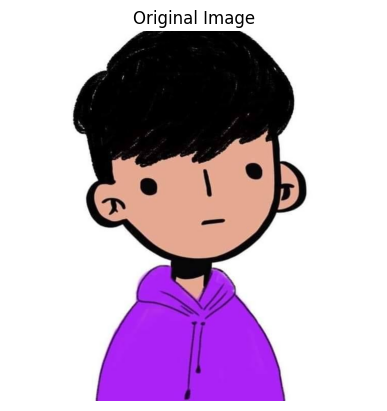

In [10]:
from google.colab import files
from io import BytesIO
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Enable inline display for matplotlib
%matplotlib inline

# Upload an image
uploaded = files.upload()

# Convert to OpenCV format
image_path = next(iter(uploaded))  # Get the image file name
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Function to display the image
def display_image(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')  # Hide axes for a cleaner display
    plt.show()

# Display the uploaded image
display_image(image, "Original Image")


**Exercise 1: Scaling and Rotation**

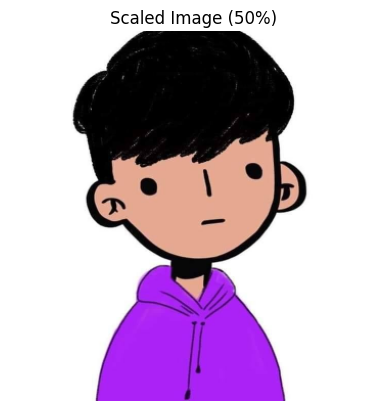

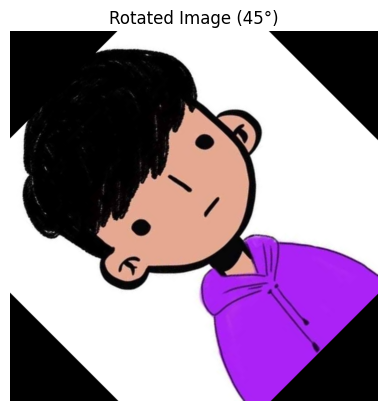

'\nThese lines apply the scaling and rotation functions to the uploaded image and display the results.\n'

In [11]:
# Scaling
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    scaled_img = cv2.resize(
        img,
        (int(width * scale_factor), int(height * scale_factor)),
        interpolation=cv2.INTER_LINEAR
    )
    return scaled_img

"""
scale_image(): This function scales the image by a given factor.
The cv2.resize() function takes the original dimensions of the image,
multiplies them by the scale_factor, and resizes the image accordingly.
INTER_LINEAR is a common interpolation method for resizing.
"""

# Rotate
def rotate_image(img, angle):
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, matrix, (width, height))
    return rotated_img

"""
rotate_image(): Rotates the image around its center. cv2.getRotationMatrix2D() creates
a transformation matrix for rotation, and cv2.warpAffine() applies this transformation.
The angle parameter controls the degree of rotation.
"""

# Scale image by 0.5
scaled_image = scale_image(image, 0.5)
display_image(scaled_image, "Scaled Image (50%)")

# Rotate image by 45 degrees
rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image (45°)")

"""
These lines apply the scaling and rotation functions to the uploaded image and display the results.
"""


**Exercise 3: Edge Detection using Canny**

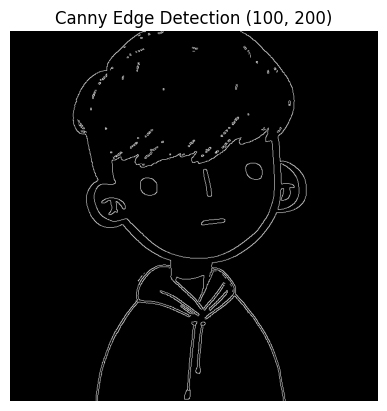

"\ncv2.Canny(): Detects edges in the image by calculating the gradient (rate of intensity change)\nbetween pixels. The two threshold values (100 and 200) define the edges'\nsensitivity. Lower thresholds detect more edges, while higher thresholds detect only the\nmost prominent edges.\n"

In [12]:
# Canny Edge Detection
edges = cv2.Canny(image, 100, 200)
display_image(edges, "Canny Edge Detection (100, 200)")

"""
cv2.Canny(): Detects edges in the image by calculating the gradient (rate of intensity change)
between pixels. The two threshold values (100 and 200) define the edges'
sensitivity. Lower thresholds detect more edges, while higher thresholds detect only the
most prominent edges.
"""


**Exercise 4: Basic Image Processor (Interactive)**

Enter action (scale, rotate, gaussian_blur, median_blur, canny): canny


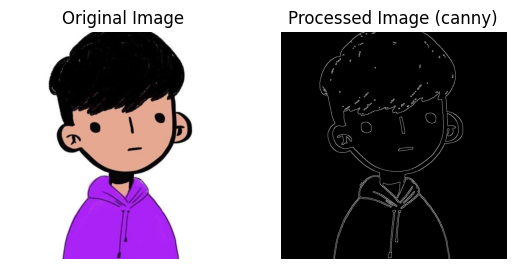

'\nThis allows users to enter their desired transformation interactively (via the\ninput() function). It processes the image and displays both the original and transformed\nversions side by side.\n'

In [13]:
def process_image(img, action):
    if action == 'scale':
        return scale_image(img, 0.5)
    elif action == 'rotate':
        return rotate_image(img, 45)
    elif action == 'gaussian_blur':
        return cv2.GaussianBlur(img, (5, 5), 0)
    elif action == 'median_blur':
        return cv2.medianBlur(img, 5)
    elif action == 'canny':
        return cv2.Canny(img, 100, 200)
    else:
        return img

"""
process_image(): This function allows users to specify an image transformation (scaling,
rotation, blurring, or edge detection). Depending on the action passed, it will apply the
corresponding image processing technique and return the processed image.
"""

action = input("Enter action (scale, rotate, gaussian_blur, median_blur, canny): ")
processed_image = process_image(image, action)
display_images(image, processed_image, "Original Image", f"Processed Image ({action})")

"""
This allows users to enter their desired transformation interactively (via the
input() function). It processes the image and displays both the original and transformed
versions side by side.
"""


**Exercise 5: Comparison of Filtering Techniques**

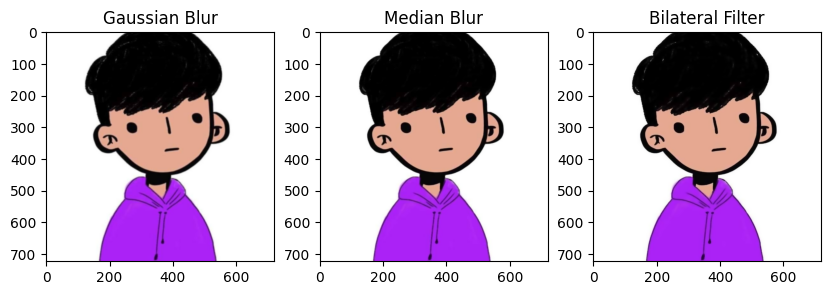

In [14]:
# Applying Gaussian, Median, and Bilateral filters
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
median_blur = cv2.medianBlur(image, 5)
bilateral_filter = cv2.bilateralFilter(image, 9, 75, 75)

"""
cv2.bilateralFilter(): This filter smooths the image while keeping edges sharp, unlike
Gaussian or median filters. It’s useful for reducing noise while preserving details.
"""

# Display the results for comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filter")

plt.show()
